## Análisis datos temperatura en Atenas, Grecia
Integrantes: Alex Pogo, Anthony Cuenca

Arquitectura de Computadores

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [11]:
import csv
csv_file = 'clima-atenas-hoy.csv'
filtered_rows = []
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row)==30:
            filtered_rows.append(row)
len(filtered_rows)

52

In [12]:
header = filtered_rows[0]
data = filtered_rows[1:]
print(len(header), len(data))

30 51


In [13]:
df = pd.DataFrame(data, columns=header)
df.shape

(51, 30)

In [14]:
df.sample(5)

,dt,coord_lon,coord_lat,weather_0_id,weather_0_main,weather_0_description,weather_0_icon,base,main_temp,main_feels_like,...,clouds_all,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
1,1754262610,23.7162,37.9795,800,Clear,clear sky,01n,stations,27.62,28.2,...,0,2,2005332,GR,1754278240,1754328704,10800,264371,Athens,200
8,1754269809,23.7162,37.9795,800,Clear,clear sky,01n,stations,26.62,26.62,...,0,2,2005332,GR,1754278240,1754328704,10800,264371,Athens,200
18,1754325978,23.7162,37.9795,800,Clear,clear sky,01d,stations,30.8,32.68,...,0,2,2081401,GR,1754278240,1754328704,10800,264371,Athens,200
12,1754324233,23.7162,37.9795,801,Clouds,few clouds,02d,stations,31.3,33.33,...,20,2,2081401,GR,1754278240,1754328704,10800,264371,Athens,200
13,1754323819,23.7162,37.9795,801,Clouds,few clouds,02d,stations,31.41,33.53,...,20,2,2081401,GR,1754278240,1754328704,10800,264371,Athens,200


In [15]:
df.dt = df.dt.astype(int)
df.sys_sunrise = df.sys_sunrise.astype(int)
df.sys_sunset = df.sys_sunset.astype(int)
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        next

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dt                     51 non-null     int64  
 1   coord_lon              51 non-null     float64
 2   coord_lat              51 non-null     float64
 3   weather_0_id           51 non-null     int64  
 4   weather_0_main         51 non-null     object 
 5   weather_0_description  51 non-null     object 
 6   weather_0_icon         51 non-null     object 
 7   base                   51 non-null     object 
 8   main_temp              51 non-null     float64
 9   main_feels_like        51 non-null     float64
 10  main_temp_min          51 non-null     float64
 11  main_temp_max          51 non-null     float64
 12  main_pressure          51 non-null     int64  
 13  main_humidity          51 non-null     int64  
 14  main_sea_level         51 non-null     int64  
 15  main_grn

Se convierten los enteros al formato fecha

In [17]:
from datetime import datetime
dfl = df.copy()
dfl.dt = df.dt.apply(lambda x: datetime.fromtimestamp(x))
dfl.sys_sunrise = df.sys_sunrise.apply(lambda x: datetime.fromtimestamp(x))
dfl.sys_sunset = df.sys_sunset.apply(lambda x: datetime.fromtimestamp(x))
dfl.sample(10)

,dt,coord_lon,coord_lat,weather_0_id,weather_0_main,weather_0_description,weather_0_icon,base,main_temp,main_feels_like,...,clouds_all,sys_type,sys_id,sys_country,sys_sunrise,sys_sunset,timezone,id,name,cod
41,2025-08-04 14:13:14,23.7162,37.9795,800,Clear,clear sky,01n,stations,29.11,29.22,...,0,2,2005332,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200
22,2025-08-04 12:09:30,23.7162,37.9795,800,Clear,clear sky,01d,stations,30.24,32.11,...,0,2,2081401,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200
11,2025-08-03 20:49:11,23.7162,37.9795,800,Clear,clear sky,01n,stations,26.39,26.39,...,0,2,2005332,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200
8,2025-08-03 20:10:09,23.7162,37.9795,800,Clear,clear sky,01n,stations,26.62,26.62,...,0,2,2005332,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200
5,2025-08-03 18:58:23,23.7162,37.9795,800,Clear,clear sky,01n,stations,27.28,27.83,...,0,2,2005332,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200
48,2025-08-04 16:00:06,23.7240,37.9755,800,Clear,clear sky,01n,stations,28.15,28.62,...,0,2,2005332,GR,2025-08-04 22:31:31,2025-08-05 12:30:39,10800,264371,Athens,200
40,2025-08-04 14:10:09,23.7162,37.9795,800,Clear,clear sky,01n,stations,28.97,29.06,...,0,2,2005332,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200
10,2025-08-03 20:36:53,23.7162,37.9795,800,Clear,clear sky,01n,stations,26.67,27.39,...,0,2,2005332,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200
43,2025-08-04 14:20:19,23.7162,37.9795,800,Clear,clear sky,01n,stations,28.91,29.10,...,0,2,2005332,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200
34,2025-08-04 13:25:07,23.7162,37.9795,800,Clear,clear sky,01n,stations,29.01,29.32,...,0,2,2005332,GR,2025-08-03 22:30:40,2025-08-04 12:31:44,10800,264371,Athens,200


In [18]:
dfl.to_csv('clima-atenas-hoy-d.csv', index=False) 

<Figure size 4000x4000 with 0 Axes>

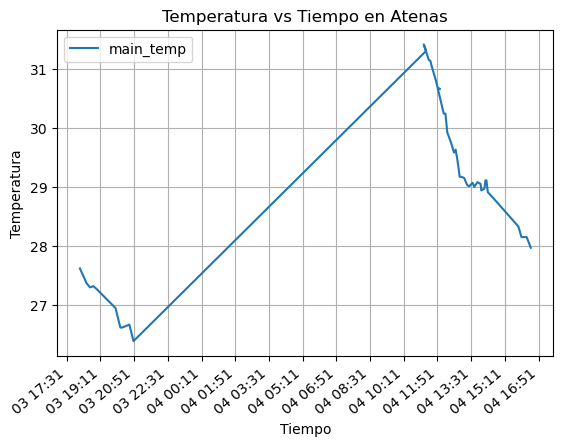

In [19]:
plt.figure(figsize=(40, 40))
dfl.plot.line('dt', 'main_temp')
plt.title('Temperatura vs Tiempo en Atenas')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura')
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=100))
plt.xticks(rotation=40)
plt.show()